# Importing all the necessary libraries

In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE
import random
from sklearn.model_selection import StratifiedShuffleSplit
from tabulate import tabulate

In [21]:
df=pd.read_csv('Creditcard_data.csv')

In [22]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


### Dataset is highly imbalanced

In [23]:
# The classes are heavily skewed.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 98.83 % of the dataset
Frauds 1.17 % of the dataset


In [24]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

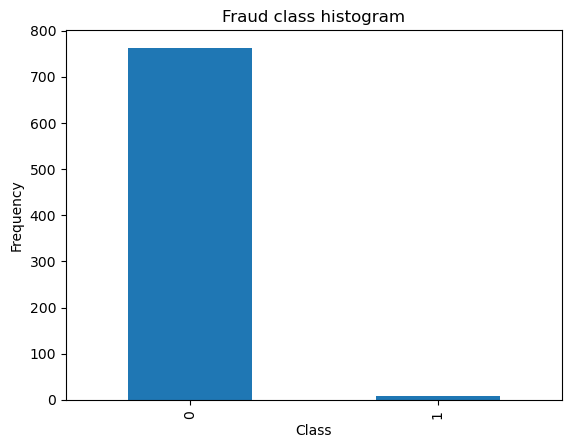

In [33]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [35]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### We first need to scale the time and amount column

In [37]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [38]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [46]:
x=df.iloc[:,:30]
y=df.iloc[:,30]
y=pd.DataFrame(y)
y

,Class
0,0
1,1
2,0
3,0
4,0
...,...
767,0
768,0
769,0
770,0


In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
xtrain.shape

(617, 30)

# We have done oversampling

In [67]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(xtrain, ytrain)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.316411,-0.075286,-0.363608,1.104008,1.300678,0.070314,0.075180,-1.010396,0.683396,-0.073378,...,-0.090921,0.123176,-0.261158,-0.685436,-0.013662,0.336313,-0.157577,0.071699,0.245539,0.099037
1,3.075999,-0.788871,0.986063,-0.202965,-0.492768,0.407691,0.305660,-0.230529,0.585028,-0.208225,...,0.010739,0.263505,-0.305874,-1.216555,-0.077602,-0.741341,0.286881,0.200347,-0.075203,0.027271
2,-0.162596,0.441899,-0.473731,0.697340,2.279600,1.359875,0.342429,1.392886,0.289971,0.170677,...,1.608721,0.330993,-0.462425,-0.486810,-0.235667,-0.726568,0.085981,-0.351095,0.289067,-0.043030
3,-0.134740,-0.075286,1.095067,-0.014393,1.408552,1.266546,-0.944751,0.029578,-0.598515,0.175291,...,-0.004694,-0.072113,0.013107,0.248009,-0.002564,0.570100,0.387137,-0.442319,0.074531,0.032215
4,1.269176,0.795417,-0.755011,-0.517761,1.760091,-0.654206,-0.039143,-0.492847,-0.047345,0.118936,...,-0.067227,0.239908,-0.049608,-0.200904,0.268931,0.108087,-0.468660,0.729549,-0.017462,0.077163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,-0.315260,0.708988,-0.573606,0.392769,1.508540,0.265052,0.751639,-0.928002,0.751751,-0.165300,...,-1.033157,-0.111066,0.009072,0.102656,-0.195427,0.378531,0.363548,-0.364942,-0.091108,-0.100351
1214,7.885776,0.698913,-2.051803,-2.345232,0.908264,1.920193,0.963780,-1.065436,0.272243,-0.100651,...,0.172580,1.600593,0.442989,0.145851,1.088146,-0.146947,0.266269,-0.090082,-0.199608,0.034653
1215,-0.315218,0.711104,-0.557905,0.392528,1.498237,0.268701,0.742127,-0.929198,0.746114,-0.165686,...,-1.025989,-0.110746,0.006535,0.094740,-0.192657,0.378227,0.362327,-0.361004,-0.090517,-0.099225
1216,-0.307331,0.812450,-1.969040,-2.188834,2.313104,0.923840,2.276522,0.487636,-1.823865,0.710402,...,-0.566091,0.546538,0.350008,1.028432,0.230481,-0.782539,-0.233247,0.786325,-0.151158,-0.196633


In [74]:
y_res

,Class
0,0
1,0
2,0
3,0
4,0
...,...
1213,1
1214,1
1215,1
1216,1


In [75]:
df_train=pd.concat([X_res,y_res],axis=1)
df_train

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.316411,-0.075286,-0.363608,1.104008,1.300678,0.070314,0.075180,-1.010396,0.683396,-0.073378,...,0.123176,-0.261158,-0.685436,-0.013662,0.336313,-0.157577,0.071699,0.245539,0.099037,0
1,3.075999,-0.788871,0.986063,-0.202965,-0.492768,0.407691,0.305660,-0.230529,0.585028,-0.208225,...,0.263505,-0.305874,-1.216555,-0.077602,-0.741341,0.286881,0.200347,-0.075203,0.027271,0
2,-0.162596,0.441899,-0.473731,0.697340,2.279600,1.359875,0.342429,1.392886,0.289971,0.170677,...,0.330993,-0.462425,-0.486810,-0.235667,-0.726568,0.085981,-0.351095,0.289067,-0.043030,0
3,-0.134740,-0.075286,1.095067,-0.014393,1.408552,1.266546,-0.944751,0.029578,-0.598515,0.175291,...,-0.072113,0.013107,0.248009,-0.002564,0.570100,0.387137,-0.442319,0.074531,0.032215,0
4,1.269176,0.795417,-0.755011,-0.517761,1.760091,-0.654206,-0.039143,-0.492847,-0.047345,0.118936,...,0.239908,-0.049608,-0.200904,0.268931,0.108087,-0.468660,0.729549,-0.017462,0.077163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,-0.315260,0.708988,-0.573606,0.392769,1.508540,0.265052,0.751639,-0.928002,0.751751,-0.165300,...,-0.111066,0.009072,0.102656,-0.195427,0.378531,0.363548,-0.364942,-0.091108,-0.100351,1
1214,7.885776,0.698913,-2.051803,-2.345232,0.908264,1.920193,0.963780,-1.065436,0.272243,-0.100651,...,1.600593,0.442989,0.145851,1.088146,-0.146947,0.266269,-0.090082,-0.199608,0.034653,1
1215,-0.315218,0.711104,-0.557905,0.392528,1.498237,0.268701,0.742127,-0.929198,0.746114,-0.165686,...,-0.110746,0.006535,0.094740,-0.192657,0.378227,0.362327,-0.361004,-0.090517,-0.099225,1
1216,-0.307331,0.812450,-1.969040,-2.188834,2.313104,0.923840,2.276522,0.487636,-1.823865,0.710402,...,0.546538,0.350008,1.028432,0.230481,-0.782539,-0.233247,0.786325,-0.151158,-0.196633,1


# Random Sampling

In [120]:
df_train.shape[0]

1218

In [123]:
def size_random(e):
    n=((1.96**2)*0.5*0.5)/e**2
    return int(n)
def size_stratified(e,s):
    n=((1.96**2)*0.5*0.5)/(e/s)**2
    return int(n)
def size_systematic(interval):
    return int(df_train.shape[0]/interval)
def size_cluster(e,c):
    n=((1.96**2)*0.5*0.5)/(e/c)**2
    return int(n)

In [90]:
sample_1_indices=random.sample(range(len(df_train)), size_random(0.05))
sample_1=df_train.iloc[sample_1_indices]
sample_1

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
384,16.515442,0.697218,-0.239505,-3.940241,-0.147576,-0.671347,-2.239256,0.908178,-0.377398,0.157943,...,1.217690,0.076296,-1.132178,-0.486820,-0.302911,-0.304121,-0.469811,-0.077517,0.151745,0
300,0.140593,-0.333879,-0.782666,1.017987,1.505851,0.920905,0.758765,0.392475,1.357625,-0.666453,...,0.663807,-0.410457,0.145970,-0.248113,-0.452121,0.014228,-0.281961,0.118371,-0.508471,0
220,-0.318430,-0.036007,1.196193,0.245161,0.631947,0.642941,-0.413133,-0.699728,0.019533,-0.112500,...,-0.109478,-0.203868,-0.533641,0.201929,0.406872,0.116137,0.102675,-0.009121,0.019700,0
792,-0.315073,0.718403,-0.503746,0.391699,1.462701,0.281287,0.709317,-0.933323,0.726670,-0.167017,...,-0.109644,-0.002217,0.067434,-0.183102,0.377180,0.358115,-0.347420,-0.088479,-0.095343,1
335,2.435103,-0.255319,0.860652,-0.247375,0.754082,1.185492,-0.486174,0.241013,-0.197776,0.136015,...,0.176969,0.285398,0.612468,-0.175761,0.047503,0.378592,-0.305092,0.037626,0.043644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-0.296339,0.103690,-0.701132,-1.371396,1.530691,0.858425,1.484310,0.318851,-1.283336,0.502100,...,0.340050,0.158599,0.448861,0.217834,-0.646561,-0.062005,0.561796,-0.077553,-0.095439,1
273,0.078018,-0.828151,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,...,-0.203461,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,0
880,-0.307389,0.385098,-0.980949,0.107915,0.923198,-0.371017,0.698123,-0.237643,0.179141,0.126275,...,-0.015655,-0.191498,-0.307509,-0.167986,-0.263943,-0.205199,0.210738,-0.258222,-0.280590,1
79,1.678543,-0.199673,-0.342871,-0.199546,1.976353,-0.003495,-1.170366,0.883501,-0.151879,0.160106,...,-0.572162,-0.313443,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,0


In [95]:
sample_1['Class'].value_counts()

0    199
1    185
Name: Class, dtype: int64

In [116]:
n_samples = 1218-size_stratified(0.05,1)
sam
# Define the stratification variables
strata = ['Class']

# Split the data into strata using the StratifiedShuffleSplit function
sss = StratifiedShuffleSplit(n_splits=1, train_size=n_samples, random_state=123)

# Loop over each split and draw the samples
for train_index, test_index in sss.split(df_train, df_train[strata]):
    sample_2_stratified = df_train.iloc[test_index]

In [117]:
sample_2_stratified

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
99,-0.029774,0.382979,1.091666,0.068682,1.230334,2.554474,-0.454169,0.915781,-0.701016,0.396866,...,-0.216638,-0.098440,-0.178428,0.007277,-0.504025,0.255974,0.022213,0.048714,0.027057,0
673,-0.312157,0.920549,0.335526,0.268713,0.577808,0.275973,0.035675,-0.828741,0.148075,-0.102292,...,-0.050156,-0.253828,-0.627182,0.007771,0.164431,0.049947,0.139305,-0.121583,-0.096632,1
325,4.551574,0.906710,0.940965,-1.868811,0.426719,-1.717117,-1.861869,-0.357676,-0.767728,-0.039816,...,-0.038766,-0.446134,-1.003234,-0.181037,-0.105475,0.271430,-0.092695,0.028733,0.063535,0
700,1.371719,0.903088,0.578513,-0.191422,0.430335,0.942977,-0.086568,-1.067061,0.130796,-0.187797,...,0.269849,-0.137072,-0.622303,0.324781,0.242551,0.230386,0.056532,-0.058600,0.031705,1
457,0.208619,0.000000,0.057780,1.550356,-1.950408,2.041473,2.258426,4.692012,-2.303907,-4.492133,...,1.419343,-2.477111,0.803886,0.284487,0.993049,-0.039252,0.173406,0.181840,0.378080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,-0.310969,0.924916,1.028495,0.368248,0.457327,0.637368,-0.218926,-1.050023,0.176567,-0.204668,...,-0.078446,-0.249815,-0.705088,0.087223,0.347559,0.238948,0.036897,-0.030815,0.014510,1
74,0.168248,0.824877,-1.393265,-1.095569,2.607795,-2.529060,-0.135265,-0.373239,0.221446,-0.962847,...,-0.229820,-0.281365,0.563218,-0.129765,0.089264,0.317551,-0.288551,-0.863521,-0.519168,0
495,1.515846,0.671031,1.164359,-0.283474,-0.247022,0.192064,-0.327522,-0.822581,0.241389,-0.228467,...,0.045042,-0.077166,-0.311768,-0.214784,-0.041134,0.552795,1.114887,-0.116519,0.001287,0
1017,-0.314785,0.681992,-1.079395,-0.010051,1.843559,0.317742,1.177392,-0.690049,0.457294,-0.023276,...,-0.013998,0.116592,0.410329,-0.179552,0.210091,0.304995,-0.268349,-0.107294,-0.132156,1


In [125]:
interval = 3

# Calculate the number of samples we need
n_samples = size_systematic(interval)

# Define the starting point of the sample
start = 0

# Initialize an empty list to hold the sample
sample_3_systematic = []

# Loop over the dataset and add every kth row to the sample
for i in range(n_samples):
    index = start + i * interval
    sample_3_systematic.append(df_train.iloc[index])

# Convert the sample to a new DataFrame
sample_3_systematic = pd.DataFrame(sample_3_systematic)

In [126]:
sample_3_systematic.shape

(406, 31)

In [130]:
sample_4_indices=random.sample(range(len(df_train)), size_random(0.03))
sample_4=df_train.iloc[sample_4_indices]
sample_4

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
520,4.799051,0.680851,0.716662,-1.097812,0.629443,1.939510,-0.494739,1.819965,-0.624840,0.482657,...,0.388818,-0.263286,-0.978693,-0.359244,-1.332021,0.296656,0.937425,-0.068357,0.032839,0
176,-0.205793,-0.042553,-0.334463,0.826789,2.207683,0.470566,-0.534082,-0.702739,0.286891,-0.039518,...,0.083823,0.053746,0.174343,0.010815,0.735725,-0.622745,0.219987,0.131556,0.152586,0
235,2.429047,-0.546645,-0.182928,-0.920683,1.818758,-2.450936,-1.247560,0.147436,0.218629,-0.407290,...,-0.242810,0.030806,0.848899,0.120259,0.219241,-0.441860,-0.386687,-0.291553,-0.448051,0
430,-0.281490,0.572831,-0.942973,1.812575,2.112754,2.211791,-0.067565,-0.614476,0.775533,-0.078299,...,0.295910,-0.181812,-0.441114,0.004498,0.881532,-0.169525,-0.213305,0.313371,0.246707,0
246,-0.296427,0.281506,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,...,-0.148074,-0.240934,-0.790563,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,-0.291289,-0.021916,0.008923,-0.738893,1.130982,0.864174,0.713006,-0.433184,-0.754077,0.176526,...,0.188410,-0.015833,-0.056464,0.193054,-0.118529,0.049352,0.388000,-0.062113,-0.046403,1
490,5.761708,0.006547,-1.167212,1.263648,-0.109849,-0.783619,-1.472694,-0.212799,1.732683,-0.882945,...,-0.368899,0.770748,0.105265,0.127680,0.509606,-0.401951,0.835236,0.286015,0.067264,0
808,-0.297957,0.103926,-0.136952,0.211939,0.713780,0.065522,0.229306,-0.708297,0.171545,-0.043136,...,-0.041290,-0.237354,-0.534805,-0.053235,0.071188,-0.040244,0.162411,-0.172968,-0.161815,1
892,-0.308081,0.876787,-0.490291,-1.169717,1.465844,0.931741,1.154979,-0.175987,-1.088377,0.325455,...,0.298903,0.093674,0.260916,0.218958,-0.300775,-0.015169,0.505673,-0.077142,-0.077427,1


In [135]:
sample_5_indices=random.sample(range(len(df_train)), size_random(0.04))
sample_5=df_train.iloc[sample_5_indices]
sample_5

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
56,2.105268,-0.795417,-0.554065,0.215728,0.844265,-0.753067,0.034848,-0.558597,1.090401,-0.203873,...,0.383283,0.212134,0.702338,-0.005701,0.147346,0.245652,-0.440456,0.147130,0.139468,0
292,-0.318430,0.831424,-0.696402,1.186597,0.761499,0.783975,0.825519,1.125638,0.422931,0.336892,...,0.246714,-0.098476,0.084491,-0.302056,-1.344991,0.091047,-0.161472,0.400489,0.230986,0
233,-0.262313,0.513912,-0.142562,0.995908,1.348949,0.651922,0.402290,-0.141452,0.735366,-0.182281,...,0.273830,0.259457,1.160833,-0.260795,0.051830,-0.405058,-0.273672,0.304349,0.023759,0
284,-0.134538,0.684124,1.130024,-0.060944,0.662074,1.033990,-0.441560,0.310187,-0.559948,0.349136,...,-0.258810,0.195852,0.511310,-0.100457,-0.344298,0.420079,-0.213097,0.040658,0.010599,0
99,-0.029774,0.382979,1.091666,0.068682,1.230334,2.554474,-0.454169,0.915781,-0.701016,0.396866,...,-0.216638,-0.098440,-0.178428,0.007277,-0.504025,0.255974,0.022213,0.048714,0.027057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,4.888577,0.642029,-1.961154,-1.338110,1.422405,1.211109,1.158510,-0.981004,0.608747,-0.113227,...,0.966142,0.357085,0.356631,0.539953,0.053708,0.336755,-0.303204,-0.176882,-0.046884,1
202,0.466391,0.418985,-1.086133,-0.704548,2.329021,-0.885715,0.617677,0.478894,-0.267414,0.354042,...,0.188552,0.021119,0.213192,0.186858,-0.207543,-0.701080,0.737603,-0.093269,-0.085372,0
875,-0.299644,0.341933,-1.140366,-1.751359,1.847232,0.953620,1.814791,0.411945,-1.562826,0.598857,...,0.434982,0.247787,0.701203,0.244876,-0.717729,-0.115181,0.662939,-0.093463,-0.121000,1
461,3.782095,0.212766,-1.531271,1.399621,-0.587061,2.175002,-2.137637,-0.501576,-1.215215,0.956862,...,0.805862,0.557904,0.085267,0.403096,0.454438,0.202522,-0.313118,0.527182,0.202575,0


In [147]:
x_1=sample_1.iloc[:,:30]
y_1=(sample_1.iloc[:,30])

x_2=sample_2_stratified.iloc[:,:30]
y_2=(sample_2_stratified.iloc[:,30])

x_3=sample_3_systematic.iloc[:,:30]
y_3=(sample_3_systematic.iloc[:,30])

x_4=sample_4.iloc[:,:30]
y_4=(sample_4.iloc[:,30])

x_5=sample_5.iloc[:,:30]
y_5=(sample_5.iloc[:,30])


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [154]:
samples=[[x_1,y_1],[x_2,y_2],[x_3,y_3],[x_4,y_4],[x_5,y_5]]

In [163]:
lr_scores=["LogisticRegression"]
for i in samples:
    lr=LogisticRegression()
    lr.fit(i[0],i[1])
    lr_scores.append(lr.score(xtest,ytest))
lr_scores

['LogisticRegression',
 0.832258064516129,
 0.8580645161290322,
 0.832258064516129,
 0.8580645161290322,
 0.8451612903225807]

In [164]:
dt_scores=["DecisionTreeClassifier"]
for i in samples:
    dt=DecisionTreeClassifier()
    dt.fit(i[0],i[1])
    dt_scores.append(dt.score(xtest,ytest))
dt_scores

['DecisionTreeClassifier',
 0.9096774193548387,
 0.9354838709677419,
 0.9096774193548387,
 0.967741935483871,
 0.9225806451612903]

In [165]:
rf_scores=["RandomForestClassifier"]
for i in samples:
    rf=RandomForestClassifier()
    rf.fit(i[0],i[1])
    rf_scores.append(rf.score(xtest,ytest))
rf_scores

['RandomForestClassifier',
 0.9806451612903225,
 0.9935483870967742,
 0.9935483870967742,
 0.9935483870967742,
 0.9935483870967742]

In [166]:
svc_scores=["Support Vector Classifier"]
for i in samples:
    svc=SVC()
    svc.fit(i[0],i[1])
    svc_scores.append(svc.score(xtest,ytest))
svc_scores

['Support Vector Classifier',
 0.9096774193548387,
 0.9354838709677419,
 0.896774193548387,
 0.9612903225806452,
 0.9161290322580645]

In [167]:
knn_scores=["K Nearest Neighbours"]
for i in samples:
    knn=KNeighborsClassifier()
    knn.fit(i[0],i[1])
    knn_scores.append(knn.score(xtest,ytest))
knn_scores

['K Nearest Neighbours',
 0.8,
 0.7548387096774194,
 0.8193548387096774,
 0.9161290322580645,
 0.8580645161290322]

In [169]:
first_row=["Sample 1","Sample 2","Sample 3","Sample 4","Sample 5"]
table=[first_row,lr_scores,dt_scores,rf_scores,svc_scores,knn_scores]
table

[['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'],
 ['LogisticRegression',
  0.832258064516129,
  0.8580645161290322,
  0.832258064516129,
  0.8580645161290322,
  0.8451612903225807],
 ['DecisionTreeClassifier',
  0.9096774193548387,
  0.9354838709677419,
  0.9096774193548387,
  0.967741935483871,
  0.9225806451612903],
 ['RandomForestClassifier',
  0.9806451612903225,
  0.9935483870967742,
  0.9935483870967742,
  0.9935483870967742,
  0.9935483870967742],
 ['Support Vector Classifier',
  0.9096774193548387,
  0.9354838709677419,
  0.896774193548387,
  0.9612903225806452,
  0.9161290322580645],
 ['K Nearest Neighbours',
  0.8,
  0.7548387096774194,
  0.8193548387096774,
  0.9161290322580645,
  0.8580645161290322]]

In [174]:
print(tabulate(table,headers="firstrow",tablefmt="github"))

|                           |   Sample 1 |   Sample 2 |   Sample 3 |   Sample 4 |   Sample 5 |
|---------------------------|------------|------------|------------|------------|------------|
| LogisticRegression        |   0.832258 |   0.858065 |   0.832258 |   0.858065 |   0.845161 |
| DecisionTreeClassifier    |   0.909677 |   0.935484 |   0.909677 |   0.967742 |   0.922581 |
| RandomForestClassifier    |   0.980645 |   0.993548 |   0.993548 |   0.993548 |   0.993548 |
| Support Vector Classifier |   0.909677 |   0.935484 |   0.896774 |   0.96129  |   0.916129 |
| K Nearest Neighbours      |   0.8      |   0.754839 |   0.819355 |   0.916129 |   0.858065 |
